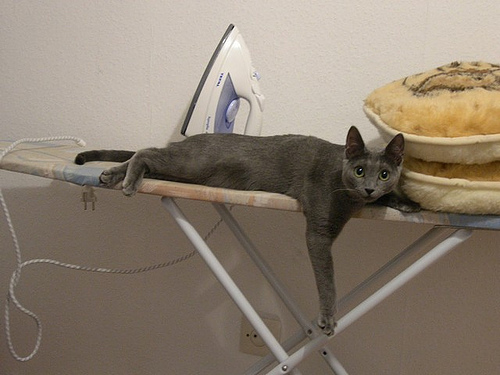

In [13]:
from PIL import Image
from pose_cond_tools.dataset_tools import AnimalPoseTools

category_id = 2
dataset_tools = AnimalPoseTools("/local/scratch/carlyn.1/datasets/animalpose/")
sample_img_path, annotation = dataset_tools.sample_random_from_category(category_id)
sample_image = Image.open(sample_img_path)

sample_image

In [14]:
skeleton_links = dataset_tools.get_skeleton(category_id)
keypoint_names = dataset_tools.annotation_data["categories"][category_id]["keypoints"]

# Color Assignment

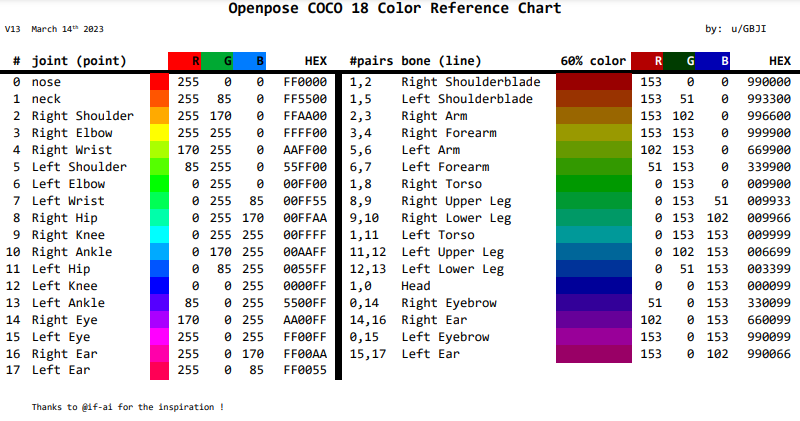

We should be able to use most of Openpose COCO color reference chart! [GH Discussion](https://github.com/lllyasviel/ControlNet/discussions/266)


In [15]:
# animalpose_kpt_colors = {
#    "left_ear" : (0, 0, 0),
#    "right_ear" : (0, 0, 0),
#    "left_eye": (255, 0, 255),
#    "right_eye": (170, 0, 255),
#    "nose": (255, 0, 0),
#    "throat": (255, 85, 0),
#    "tailbase": (41, 163, 129),  # Custom!
#    "withers" : (0, 0, 0), # Custom!
#    "left_front_elbow": (85, 255, 0),
#    "left_front_knee": (0, 255, 0),
#    "left_front_paw": (0, 255, 85),  # In place of left wrist
#    "right_front_elbow": (255, 170, 0),
#    "right_front_knee": (255, 255, 0),
#    "right_front_paw": (170, 255, 85),  # In place of right wrist
#    "left_back_elbow": (0, 85, 255),
#    "left_back_knee": (0, 0, 255),
#    "left_back_paw": (85, 0, 255),  # In place of left ankle
#    "right_back_elbow": (0, 85, 255),
#    "right_back_knee": (0, 255, 255),
#    "right_back_paw": (0, 170, 255),  # In place of right ankle
# }

face_color = (100, 200, 5)
limb_color = (255, 0, 0)
other_color = (200, 200, 50)
kp_color = (0, 0, 255)
body_color = (0, 0, 255)

animalpose_kpt_colors = {
    "left_ear": kp_color,
    "right_ear": kp_color,
    "left_eye": kp_color,
    "right_eye": kp_color,
    "nose": kp_color,
    "throat": kp_color,
    "tailbase": kp_color,
    "withers": kp_color,
    "left_front_elbow": kp_color,
    "left_front_knee": kp_color,
    "left_front_paw": kp_color,
    "right_front_elbow": kp_color,
    "right_front_knee": kp_color,
    "right_front_paw": kp_color,
    "left_back_elbow": kp_color,
    "left_back_knee": kp_color,
    "left_back_paw": kp_color,
    "right_back_elbow": kp_color,
    "right_back_knee": kp_color,
    "right_back_paw": kp_color,
}

# [[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 17], [18, 19],
# [5, 9], [6, 10], [7, 11], [8, 12], [9, 13], [10, 14], [11, 15], [12, 16]]
animalpose_link_colors = {
    (0, 1): (137, 255, 255),  #
    (0, 2): face_color,  #
    (1, 2): face_color,  #
    (0, 3): face_color,  #
    (1, 4): face_color,  #
    (2, 17): (75, 162, 138),
    (18, 19): body_color,
    (5, 9): limb_color,  #
    (6, 10): limb_color,  #
    (7, 11): limb_color,
    (8, 12): limb_color,  #
    (9, 13): limb_color,  #
    (10, 14): limb_color,  #
    (11, 15): limb_color,  #
    (12, 16): limb_color,  #
    (19, 18): body_color,  #
    (19, 8): body_color,  #
    (19, 7): body_color,  #
    (17, 6): body_color,  #
    (17, 5): body_color,  #
    (18, 17): body_color,  #
}


In [16]:
import numpy as np

# NOTE: the visualizer we use wants the colors in BGR format
kpt_colors = [tuple(list(animalpose_kpt_colors[name])) for name in keypoint_names]
link_colors = [
    tuple(list(animalpose_link_colors[tuple(link)])) for link in skeleton_links
]

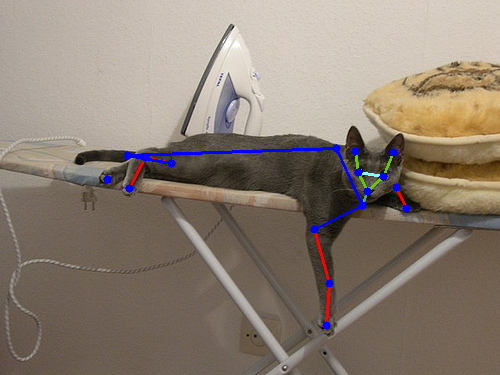

In [17]:
img = dataset_tools.create_pose_image(
    annotation,
    return_black_background=False,
    kpt_color=kpt_colors,
    link_color=link_colors,
)
img

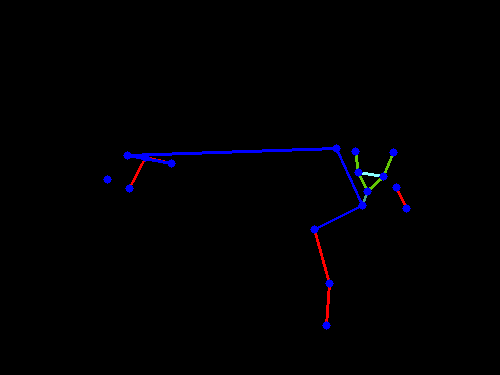

In [18]:
img = dataset_tools.create_pose_image(
    annotation,
    return_black_background=True,
    kpt_color=kpt_colors,
    link_color=link_colors,
)
img.save("test_animalpose.png")
img